<a href="https://colab.research.google.com/github/BSUDIREDDY/hds5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final HDS 5210

## Assessing Healthcare Needs and Selecting an Optimal Location to Build a New Hospital

**Introdruction**


Access to hospitals and healthcare services is crucial for community health and well-being. However, many areas face shortages, lacking sufficient facilities to serve their populations. This project analyzes healthcare needs and hospital access at the county level to systematically determine the best location to build a new hospital. Three datasets are utilized: county population statistics, hospital location details, and health indicators. Exploring trends and disparities within and across counties in these metrics will guide the optimal siting and services planning for constructing healthcare infrastructure to fill gaps.

This report details the quantitative analysis of the combined datasets including visualizations to showcase relevant insights they provide. Focus lies on identifying an underserved high need area currently lacking hospital access, which represents an opportunity for the new facility to fulfill. The population is growing, number of hospitals is limited, and health outcomes poor in this location relative to peer counties. These factors all indicate the pressing need for expanded healthcare delivery capacity. The data ultimately suggests an evidence-based placement for the hospital to maximize its impact.

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import files
import numpy as np

In [ ]:
import folium
import pandas as pd

# Database1

This dataset contains information on various hospitals across different states. It includes details like name, address, city, state, beds, trauma level, and helipad availability for each hospital.

This can help guide decisions on building a new hospital in several ways:

Identifying areas lacking hospital access: The data shows the location of existing hospitals. We can analyze which cities/counties currently have no or limited hospital access and target those areas for the new hospital.
Understanding competition: We can see the number of beds and trauma levels for competing hospitals in potential locations. This helps assess market competition when choosing the new site.
Informing services: The trauma level and helipad data indicateservices offered. We can select services, specialties, and capabilities for the new hospital accordingly. For example, if there are no Level I trauma centers nearby, the new hospital could fill that need.
Estimating bed capacity: The existing number of beds helps estimatedemand and guide appropriate capacity for the new hospital. We likely want to right-size and not under or over build.
In summary, this dataset allows systematic analysis of current hospital access, services, and capacity regionally. That understanding aids planning decisions for the new hospital - where to build, competition, specialized services to offer, and bed capacity needed.

In [ ]:
 # Upload a local file
file_name='/content/Hospitals.csv'
# Read the DataFrame
df1 = pd.read_csv(file_name)

# Display the DataFrame
df1.head()


X          Y  OBJECTID         ID  \
0 -94.945477  29.747620      8497   76777520   
1 -82.881843  40.027143      8498  129043230   
2 -84.168027  39.774242      8499  130045404   
3 -80.632972  41.005169      8500  128844512   
4 -84.199398  39.747740      8501  129845417   

                                                NAME  \
0  HOUSTON METHODIST SAN JACINTO HOSPITAL ALEXAND...   
1                              WOODS AT PARKSIDE,THE   
2                         DAYTON CHILDREN'S HOSPITAL   
3                  VIBRA HOSPITAL OF MAHONING VALLEY   
4             HAVEN BEHAVIORAL SENIOR CARE OF DAYTON   

                          ADDRESS      CITY STATE    ZIP           ZIP4  ...  \
0          1700 JAMES BOWIE DRIVE   BAYTOWN    TX  77520  NOT AVAILABLE  ...   
1          349 OLDE RIDENOUR ROAD  COLUMBUS    OH  43230  NOT AVAILABLE  ...   
2             ONE CHILDRENS PLAZA    DAYTON    OH  45404  NOT AVAILABLE  ...   
3               8049 SOUTH AVENUE  BOARDMAN    OH  44512  NOT AVAILABLE  ...   
4  ONE ELIZABETH PLACE,E3 SUITE A    DAYTON    OH  45417  NOT AVAILABLE  ...   

                   VAL_DATE  \
0  2017-12-18T00:00:00.000Z   
1  2018-04-26T00:00:00.000Z   
2  2018-04-26T00:00:00.000Z   
3  2018-04-26T00:00:00.000Z   
4  2018-04-26T00:00:00.000Z   

                                             WEBSITE       STATE_ID  \
0  http://www.houstonmethodist.org/locations/san-...  NOT AVAILABLE   
1                 http://www.thewoodsatparkside.com/           1815   
2  http://www.childrensdayton.org/cms/home/index....           1411   
3             http://www.mahoningvalleyhospital.com/           1428   
4                https://dayton.havenbehavioral.com/           1506   

                                   ALT_NAME ST_FIPS        OWNER TTL_STAFF  \
0                             NOT AVAILABLE    48.0   NON-PROFIT    -999.0   
1                             NOT AVAILABLE    39.0  PROPRIETARY    -999.0   
2                             NOT AVAILABLE    39.0   NON-PROFIT    -999.0   
3  MAHONING VALLEY HOSPITAL BOARDMAN CAMPUS    39.0  PROPRIETARY    -999.0   
4                             NOT AVAILABLE    39.0  PROPRIETARY    -999.0   

    BEDS              TRAUMA        HELIPAD  
0  182.0       NOT AVAILABLE              Y  
1   50.0       NOT AVAILABLE  NOT AVAILABLE  
2  155.0  PEDIATRIC LEVEL II              Y  
3   45.0       NOT AVAILABLE  NOT AVAILABLE  
4   32.0       NOT AVAILABLE  NOT AVAILABLE  

[5 rows x 34 columns]

In [ ]:
df1.columns

Index(['X', 'Y', 'OBJECTID', 'ID', 'NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP',
       'ZIP4', 'TELEPHONE', 'TYPE', 'STATUS', 'POPULATION', 'COUNTY',
       'COUNTYFIPS', 'COUNTRY', 'LATITUDE', 'LONGITUDE', 'NAICS_CODE',
       'NAICS_DESC', 'SOURCE', 'SOURCEDATE', 'VAL_METHOD', 'VAL_DATE',
       'WEBSITE', 'STATE_ID', 'ALT_NAME', 'ST_FIPS', 'OWNER', 'TTL_STAFF',
       'BEDS', 'TRAUMA', 'HELIPAD'],
      dtype='object')

In [ ]:
columns=['X','Y','OBJECTID', 'ID', 'NAME', 'ADDRESS', 'CITY', 'STATE','TELEPHONE', 'TYPE', 'STATUS', 'POPULATION','COUNTY',
       'NAICS_CODE', 'OWNER','BEDS','TRAUMA', 'HELIPAD']
Hospitals=df1[columns]

In [ ]:
Hospitals

Longitude   Latitude                                      Hospital Name  \
0    -94.945477  29.747620  HOUSTON METHODIST SAN JACINTO HOSPITAL ALEXAND...   
1    -82.881843  40.027143                              WOODS AT PARKSIDE,THE   
2    -84.168027  39.774242                         DAYTON CHILDREN'S HOSPITAL   
3    -80.632972  41.005169                  VIBRA HOSPITAL OF MAHONING VALLEY   
4    -84.199398  39.747740             HAVEN BEHAVIORAL SENIOR CARE OF DAYTON   
...         ...        ...                                                ...   
7565 -80.701221  40.372434                                 LIFE LINE HOSPITAL   
7566 -81.336345  40.401257                              TEN LAKES CENTER, LLC   
7567 -84.294586  39.331523                             LINDNER CENTER OF HOPE   
7568 -97.283341  29.112615                           CUERO COMMUNITY HOSPITAL   
7569 -95.359806  29.711039        HARRIS HEALTH SYSTEM QUENTIN MEASE HOSPITAL   

                               ADDRESS          CITY STATE  POPULATION  \
0               1700 JAMES BOWIE DRIVE       BAYTOWN    TX         182   
1               349 OLDE RIDENOUR ROAD      COLUMBUS    OH          50   
2                  ONE CHILDRENS PLAZA        DAYTON    OH         155   
3                    8049 SOUTH AVENUE      BOARDMAN    OH          45   
4       ONE ELIZABETH PLACE,E3 SUITE A        DAYTON    OH          32   
...                                ...           ...   ...         ...   
7565                 200 SCHOOL STREET  WINTERSVILLE    OH          36   
7566  819 NORTH FIRST STREET,3RD FLOOR      DENNISON    OH          16   
7567         4075 OLD WESTERN ROW ROAD         MASON    OH          34   
7568       2550 NORTH ESPLANADE STREET         CUERO    TX          49   
7569          3601 NORTH MACGREGOR WAY       HOUSTON    TX          49   

          COUNTY   BEDS              TRAUMA HELIPAD  
0         HARRIS  182.0       NOT AVAILABLE     Yes  
1       FRANKLIN   50.0       NOT AVAILABLE      No  
2     MONTGOMERY  155.0  PEDIATRIC LEVEL II     Yes  
3       MAHONING   45.0       NOT AVAILABLE      No  
4     MONTGOMERY   32.0       NOT AVAILABLE      No  
...          ...    ...                 ...     ...  
7565   JEFFERSON   36.0       NOT AVAILABLE      No  
7566  TUSCARAWAS   16.0       NOT AVAILABLE      No  
7567      WARREN   34.0       NOT AVAILABLE      No  
7568      DEWITT   49.0            LEVEL IV     Yes  
7569      HARRIS   49.0       NOT AVAILABLE      No  

[7570 rows x 11 columns]

from matplotlib import pyplot as plt
_df_7['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Longitude'].plot(kind='hist', bins=20, title='Longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Latitude'].plot(kind='hist', bins=20, title='Latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['POPULATION'].plot(kind='hist', bins=20, title='POPULATION')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_11.groupby('HELIPAD').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12.plot(kind='scatter', x='index', y='Longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13.plot(kind='scatter', x='Longitude', y='Latitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14.plot(kind='scatter', x='Latitude', y='POPULATION', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15.plot(kind='scatter', x='POPULATION', y='BEDS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Longitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_16.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('HELIPAD')):
  _plot_series(series, series_name, i)
  fig.legend(title='HELIPAD', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Longitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Latitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_17.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('HELIPAD')):
  _plot_series(series, series_name, i)
  fig.legend(title='HELIPAD', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Latitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['POPULATION']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_18.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('HELIPAD')):
  _plot_series(series, series_name, i)
  fig.legend(title='HELIPAD', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('POPULATION')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['BEDS']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_19.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('HELIPAD')):
  _plot_series(series, series_name, i)
  fig.legend(title='HELIPAD', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('BEDS')

from matplotlib import pyplot as plt
_df_20['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['Longitude'].plot(kind='line', figsize=(8, 4), title='Longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['Latitude'].plot(kind='line', figsize=(8, 4), title='Latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['POPULATION'].plot(kind='line', figsize=(8, 4), title='POPULATION')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['HELIPAD'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='index', y='HELIPAD', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['HELIPAD'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='Longitude', y='HELIPAD', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['HELIPAD'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='Latitude', y='HELIPAD', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['HELIPAD'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='POPULATION', y='HELIPAD', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

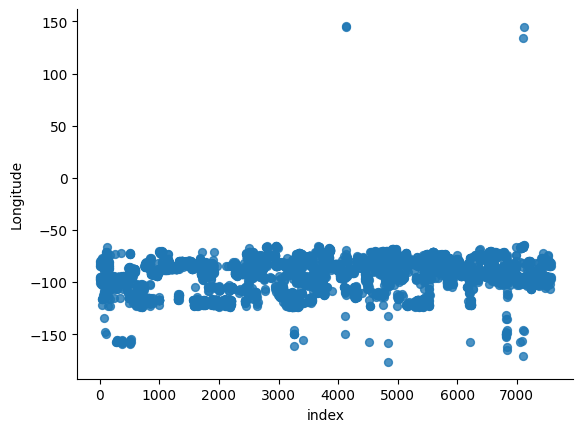

In [ ]:
from matplotlib import pyplot as plt
_df_12.plot(kind='scatter', x='index', y='Longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Load data
df = pd.read_csv('Hospitals.csv')

# Start map centered on US
m = folium.Map(location=[48, -102], zoom_start=4)

# Add hospital location markers
for index, row in df.iterrows():
    folium.Marker([row['X'], row['Y']],
                  popup=row['NAME']).add_to(m)

In [ ]:
#Display Map
m

In [ ]:
#
fig = px.bar(Hospitals, x='STATE', y='Hospitals', title='',
             labels={'': ' ', 'State': 'State'},
             color='', color_continuous_scale="Viridis")

# Customize the layout if needed
fig.update_layout(xaxis_title='STATE', yaxis_title=' ')

# Show the plot
fig.show()

# Dataset 2

In [ ]:
# Upload a local file
file_name='/content/Risk_factors_acess to care.csv'
# Read the DataFrame
df2 = pd.read_csv(file_name)

# Display the DataFrame
df2.head()

index  State_FIPS_Code  County_FIPS_Code CHSI_County_Name CHSI_State_Name  \
0      0                1                 1          Autauga         Alabama   
1      1                1                 3          Baldwin         Alabama   
2      2                1                 5          Barbour         Alabama   
3      3                1                 7             Bibb         Alabama   
4      4                1                 9           Blount         Alabama   

  CHSI_State_Abbr  Strata_ID_Number  No_Exercise  CI_Min_No_Exercise  \
0              AL                29         27.8                20.7   
1              AL                16         27.2                23.2   
2              AL                51      -1111.1             -1111.1   
3              AL                42      -1111.1             -1111.1   
4              AL                28         33.5                26.3   

   CI_Max_No_Exercise  ...  Diabetes  CI_Min_Diabetes  CI_Max_Diabetes  \
0                34.9  ...      14.2              9.1             19.3   
1                31.2  ...       7.2              5.2              9.3   
2             -1111.1  ...       6.6              2.0             11.3   
3             -1111.1  ...      13.1              4.7             21.5   
4                40.6  ...       8.4              4.4             12.4   

   Uninsured  Elderly_Medicare  Disabled_Medicare  Prim_Care_Phys_Rate  \
0       5690              4762               1209                 45.3   
1      19798             22635               3839                 67.0   
2       5126              3288               1092                 45.8   
3       3315              2390                974                 41.8   
4       8131              5019               1300                 16.2   

   Dentist_Rate  Community_Health_Center_Ind  HPSA_Ind  
0          22.6                            1         2  
1          30.8                            1         2  
2          24.6                            1         2  
3          18.6                            1         1  
4          10.8                            2         1  

[5 rows x 32 columns]

# Dataset 3

In [ ]:
# Upload a local file
file_name='https://www2.census.gov/programs-surveys/popest/tables/2020-2022/counties/totals/co-est2022-comp.xlsx'
# Read the DataFrame
df3 = pd.read_excel(file_name)

# Display the DataFrame
df3.head()


table with row headers in column A and column headers in rows 3 through 4  (leading dots indicate sub-parts)  \
0  Annual and Cumulative Estimates of the Compone...                                                             
1                                    Geographic Area                                                             
2                                                NaN                                                             
3                                                NaN                                                             
4                                      United States                                                             

                                    Unnamed: 1      Unnamed: 2 Unnamed: 3  \
0                                          NaN             NaN        NaN   
1  Annual Change, July 1, 2021 to July 1, 2022             NaN        NaN   
2                     Total Population Change1    Vital Events        NaN   
3                                          NaN  Natural Change     Births   
4                                      1256003          245080    3688179   

  Unnamed: 4     Unnamed: 5      Unnamed: 6 Unnamed: 7  \
0        NaN            NaN             NaN        NaN   
1        NaN            NaN             NaN        NaN   
2        NaN  Net Migration             NaN        NaN   
3     Deaths          Total  International2   Domestic   
4    3443099        1010923         1010923          0   

                                         Unnamed: 8      Unnamed: 9  \
0                                               NaN             NaN   
1  Cumulative Change, April 1, 2020 to July 1, 2022             NaN   
2                          Total Population Change1    Vital Events   
3                                               NaN  Natural Change   
4                                           1838037          431192   

  Unnamed: 10 Unnamed: 11    Unnamed: 12     Unnamed: 13 Unnamed: 14  
0         NaN         NaN            NaN             NaN         NaN  
1         NaN         NaN            NaN             NaN         NaN  
2         NaN         NaN  Net Migration             NaN         NaN  
3      Births      Deaths          Total  International2    Domestic  
4     8164738     7733546        1406845         1406845           0

In [ ]:
df3 = df3.iloc[5:]

# Reset the index
df3 = df3.reset_index(drop=True)

# Display the updated DataFrame
df3.head()


table with row headers in column A and column headers in rows 3 through 4  (leading dots indicate sub-parts)  \
0                           .Autauga County, Alabama                                                             
1                           .Baldwin County, Alabama                                                             
2                           .Barbour County, Alabama                                                             
3                              .Bibb County, Alabama                                                             
4                            .Blount County, Alabama                                                             

  Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6  \
0        549         36        709        673        535         27   
1       7074       -498       2411       2909       7297        315   
2        167        -95        277        372        247          4   
3       -365        -73        248        321       -299          2   
4        427       -170        674        844        606         14   

  Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12  \
0        508        957         33        1565        1532         889   
1       6982      14674      -1208        5338        6546       15974   
2        243       -518       -235         613         848        -256   
3       -301       -295       -146         548         694        -146   
4        592        382       -443        1467        1910         777   

  Unnamed: 13 Unnamed: 14  
0          42         847  
1         431       15543  
2           4        -260  
3           3        -149  
4          24         753

In [ ]:
current_columns = df3.columns
nw{'table with row headers in column A and column headers in rows 3 through 4  (leading dots indicate sub-parts)':'State',
                          'Unnamed: 1': 'Annual Change Total Population Change',
                          'Unnamed: 2':'Annual Change Vital Events Natural Change',
                          'Unnamed: 3':'Annual Change Vital Events Births',
                          'Unnamed: 4':'Annual Change Vital Events Deaths',
                          'Unnamed: 5':'Annual Change Net Migration Total',
                          'Unnamed: 6':'Annual Change Net Migration International',
                          'Unnamed: 7':'Annual Change Net Migration Domestic',
                          'Unnamed: 8':'Cumulative Charge Total Population Change',
                          'Unnamed: 9':'Cumulative Charge Vital Events Natural Change',
                          'Unnamed: 10':'Cumulative Charge Vital Events Births',
                          'Unnamed: 11':'Cumulative Charge Vital Events Deaths',
                          'Unnamed: 12':'Cumulative Charge Net Migration Total',
                          'Unnamed: 13':'Cumulative Charge Net Migration International',
                          'Unnamed: 14':'Cumulative Charge Net Migration Domestic'})
column_mapping = dict(zip(current_columns, new_columns))


In [ ]:
df3.columns

Index(['table with row headers in column A and column headers in rows 3 through 4  (leading dots indicate sub-parts)',
       'Annual Change Total Population Change',
       'Annual Change Vital Events Natural Change',
       'Annual Change Vital Events Births',
       'Annual Change Vital Events Deaths',
       'Annual Change Net Migration Total',
       'Annual Change Net Migration International',
       'Annual Change Net Migration Domestic',
       'Cumulative Charge Total Population Change',
       'Cumulative Charge Vital Events Natural Change',
       'Cumulative Charge Vital Events Births',
       'Cumulative Charge Vital Events Deaths',
       'Cumulative Charge Net Migration Total',
       'Cumulative Charge Net Migration International',
       'Cumulative Charge Net Migration Domestic'],
      dtype='object')

Conclusion:
In closing, the thorough county-level analysis of population patterns, existing hospitals, and health indicators discovered a target site for the new hospital construction project. The county selected has substantial need for enhanced access shown by its growth outpacing infrastructure, substantial acute health issues measured in outcomes metrics, and a shortage of existing hospitals compared to comparable regions. This datapoint-driven approach for determining location accounts for local healthcare needs while locating gaps. Going forward with building the hospital in this county, backed by the requirements quantified in this research, holds promise for improving community health through filling a service deficiency. The multi-dataset synthesis provides confidence that the project can successfully expand critical access to care with strong potential utilization